In [163]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [164]:
df = pd.read_csv("1828259.csv")#this my dataset 

In [165]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200718130,SYSCO F trust,2019-04-02 00:00:00,2019.0,1.928992e+09,2019-03-19,20190319,20190319,20190403.0,USD,RV,1.0,NaN,12568.57,20190319.0,NAA8,1.928992e+09,0
1,U001,0200756072,REINHA trust,2019-10-15 00:00:00,2019.0,1.929891e+09,2019-09-19,20190918,20190919,20191004.0,USD,RV,1.0,NaN,18529.02,20190919.0,NAA8,1.929891e+09,0
2,U002,0200501669,WAL MA,2020-02-21 00:00:00,2020.0,1.990569e+09,2020-01-11,20200109,20200111,20200215.0,USD,RV,1.0,NaN,8807.20,20200111.0,NAG2,1.990569e+09,0
3,U001,0200790107,ROU corporation,2019-10-30 00:00:00,2019.0,1.930010e+09,2019-10-15,20191014,20191015,20191030.0,USD,RV,1.0,NaN,38797.25,20191015.0,NAC6,1.930010e+09,0
4,U001,0200704858,WAKE foundation,2019-06-10 00:00:00,2019.0,1.929359e+09,2019-05-24,20190522,20190524,20190608.0,USD,RV,1.0,NaN,22399.43,20190524.0,NAA8,1.929359e+09,0


In [166]:
df.shape

(50000, 19)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46506 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

# Step 2 - Seprating dataframe having null value and no null value in clear date and removing useless fetures 

In [168]:
#clearing data based on clear_date as not null and we will perform oprations on this one only.
traina = df[~df['clear_date'].isnull()]

In [169]:
#calculating the shape of the dataframe which has value of clear_date as notnull an we will perform the operations on this.
traina.shape

(46506, 19)

In [170]:
#this particular data_set contains the vallue if clear_date is null.
testb = df[df['clear_date'].isnull()]

In [171]:
#counting unique value in data frame a
traina.nunique()#here 0 tell us that it has only no unique value it woill of no use we shall remove it

business_code                 6
cust_number                1439
name_customer              4219
clear_date                  403
buisness_year                 2
doc_id                    46506
posting_date                425
document_create_date        428
document_create_date.1      425
due_in_date                 490
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         42102
baseline_create_date        430
cust_payment_terms           72
invoice_id                46501
isOpen                        1
dtype: int64

In [172]:
#drop the entire coloum of area_business as it was null and of no use.
traina.drop(['area_business'],axis=1,inplace=True)
testb.drop(['area_business'],axis=1,inplace=True)

In [173]:
#counting the total number of values less  then 0 in total_open_amount
traina[traina["total_open_amount"] < 0 ].count

<bound method DataFrame.count of Empty DataFrame
Columns: [business_code, cust_number, name_customer, clear_date, buisness_year, doc_id, posting_date, document_create_date, document_create_date.1, due_in_date, invoice_currency, document type, posting_id, total_open_amount, baseline_create_date, cust_payment_terms, invoice_id, isOpen]
Index: []>

In [174]:
#counting number of null value in invoice_id
traina[traina["invoice_id"].isnull()].shape

(5, 18)

In [175]:
#checking how many rows in doc_id and invoice_id are similar
d=traina["doc_id"]==traina["invoice_id"]
d.sum()

46501

In [176]:
#so from above we can remove invoice id as it is same as of doc id
traina=traina.drop(["invoice_id"],axis=1)
testb=testb.drop(["invoice_id"],axis=1)

In [177]:
k = traina.isnull().sum()
k # now we dont have any null values we can move forward 

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
isOpen                    0
dtype: int64

In [178]:
traina = traina.drop(columns=['document type'],axis=1)
testb = testb.drop(columns=['document type'],axis=1)

# Step 3 Coverting categorical date variables into datetime format

In [179]:
#converting the due_in_date  to proper date time format in format of YYmmdd.
traina['due_in_date'] = pd.to_datetime(traina['due_in_date'], format='%Y%m%d')
#converting the due_in_date  to proper date time format in format of YYmmdd.
testb['due_in_date'] = pd.to_datetime(testb['due_in_date'], format='%Y%m%d')

In [180]:
#converting the document_create_date.1 to proper yymmdd format.

traina['document_create_date.1'] = pd.to_datetime(traina['document_create_date.1'], format='%Y%m%d')
#converting the document_create_date.1 to proper yymmdd format.

testb['document_create_date.1'] = pd.to_datetime(testb['document_create_date.1'], format='%Y%m%d')

In [181]:
#conerting the clear_date data type from object to string and then to date time format
traina["clear_date"].astype(str)
traina["clear_date"]= pd.to_datetime(traina["clear_date"])
#conerting the clear_date data type from object to string and then to date time format
testb["clear_date"].astype(str)
testb["clear_date"]= pd.to_datetime(testb["clear_date"])

In [182]:
#converting the posting date type to string from object and then converting it in date time format
traina["posting_date"].astype(str)
traina["posting_date"]= pd.to_datetime(traina["posting_date"])
testb["posting_date"].astype(str)
testb["posting_date"]= pd.to_datetime(testb["posting_date"])

In [183]:
traina['baseline_create_date'] = pd.to_datetime(traina['baseline_create_date'].astype(int), format='%Y%m%d')
testb['baseline_create_date'] = pd.to_datetime(testb['baseline_create_date'].astype(int), format='%Y%m%d')

In [184]:
traina.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

In [185]:
traina['buisness_year'] = traina['buisness_year'].astype('Int64')

In [186]:
testb.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

# Step 4 Sanity Check/ Anamoly.

In [187]:
traina=traina.drop(['buisness_year'],axis=1)
testb=testb.drop(['buisness_year'],axis=1)
##Removing business_year as it is of no use

In [188]:
traina=traina.drop(['document_create_date'],axis=1)
testb=testb.drop(['document_create_date'],axis=1)
##Removing document_create_date as it is of no use we have normalised version 

In [189]:
constantcols =  [x for x in traina.columns if traina[x].nunique()==1] #here wea re searching for columns which are constant
print(constantcols)

['posting_id', 'isOpen']


In [190]:
traina=traina.drop(['posting_id'],axis=1)
testb=testb.drop(['posting_id'],axis=1)
traina=traina.drop(['isOpen'],axis=1)
testb=testb.drop(['isOpen'],axis=1)

In [191]:
traina.drop(columns=['doc_id'],axis=1,inplace=True)
testb.drop(columns=['doc_id'],axis=1,inplace=True)

In [192]:
check1 = (df['document_create_date.1'] > df['due_in_date']).sum()
check1

135

In [193]:
traina.drop(traina[traina['document_create_date.1'] > traina['due_in_date']].index, inplace=True)
traina.shape #shape after removing anomly 

(46388, 11)

In [194]:
check2 = (traina['document_create_date.1'] > traina['clear_date']).sum()
check2

0

In [195]:
check4 = (traina['baseline_create_date'] < traina['document_create_date.1']).sum()
check4

1987

In [196]:
#Dropping the anomaly 4
traina.drop(traina[traina['baseline_create_date'] < traina['document_create_date.1']].index, inplace=True)
traina.shape

(44401, 11)

In [197]:
traina['Delay'] = (traina['clear_date']-traina['due_in_date']).dt.days
traina["Delay"].describe()

count    44401.000000
mean         1.158375
std         10.960377
min        -88.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max        287.000000
Name: Delay, dtype: float64

In [198]:
traina = traina.drop(columns=['posting_date','baseline_create_date'],axis=1)
testb = testb.drop(columns=['posting_date','baseline_create_date'],axis=1)

# Step 5 Sorting and spliting the data

In [199]:
#sorting the data based on document_create_date.1
traina = traina.sort_values(by = 'document_create_date.1', ascending = True) 

In [200]:
traina.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay
35791,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,USD,11025.27,NAH4,-5
18481,U001,0200704858,WAKE co,2019-01-09,2018-12-30,2019-01-14,USD,114737.60,NAA8,-5
42361,U001,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,USD,5506.22,NAH4,-5
32638,U001,0200769623,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,USD,12202.50,NAH4,3
7561,U001,0200769623,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,USD,16663.36,NAH4,-4


In [201]:
x_train= traina[traina['document_create_date.1'] <='2019-10-05'].copy()##70% of 43065 = 30145.5
x_train.shape

(30940, 10)

In [202]:
validation1  = traina[traina['document_create_date.1'] >'2019-10-05'].copy()

In [203]:
val1, val2 = train_test_split(validation1 ,test_size=.50,shuffle=False)#now remaing 30% into two parts 15% and 15%

In [204]:
val1.shape,val2.shape

((6730, 10), (6731, 10))

# Step 6 - Performing EDA

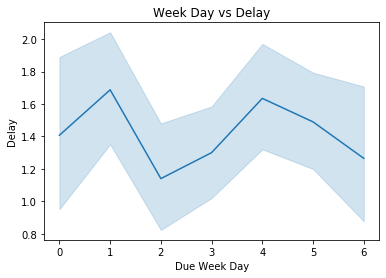

In [205]:
sns.lineplot(x_train['due_in_date'].dt.dayofweek, x_train['Delay'])
plt.xlabel("Due Week Day")
plt.ylabel("Delay")
plt.title("Week Day vs Delay")
plt.show()

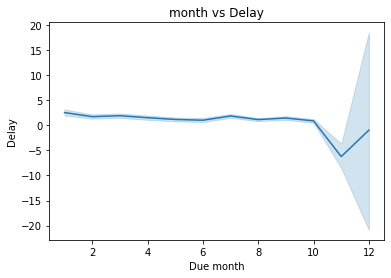

In [206]:
sns.lineplot(x_train['due_in_date'].dt.month, x_train['Delay'])
plt.xlabel("Due month")
plt.ylabel("Delay")
plt.title("month vs Delay")
plt.show()

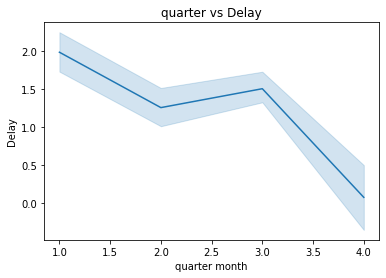

In [207]:
#plotting graph between due_in_date.month and difference(ie the delay colioumn
sns.lineplot(x_train['due_in_date'].dt.quarter, x_train['Delay'])
plt.xlabel("quarter month")
plt.ylabel("Delay")
plt.title("quarter vs Delay")
plt.show()

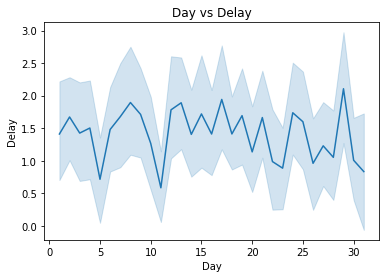

In [208]:
#makeing graph between day of month vs dealy
sns.lineplot(x_train['due_in_date'].dt.day, x_train['Delay'])
plt.xlabel("Day")
plt.ylabel("Delay")
plt.title("Day vs Delay")
plt.show()

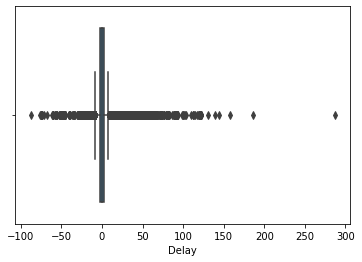

In [209]:
#looking for outliers
sns.boxplot(x=x_train["Delay"])

In [210]:
x_train.cov()

,total_open_amount,Delay
total_open_amount,1.678133e+09,-8687.937061
Delay,-8.687937e+03,135.974380


In [211]:
x_train.corr()

,total_open_amount,Delay
total_open_amount,1.000000,-0.018188
Delay,-0.018188,1.000000


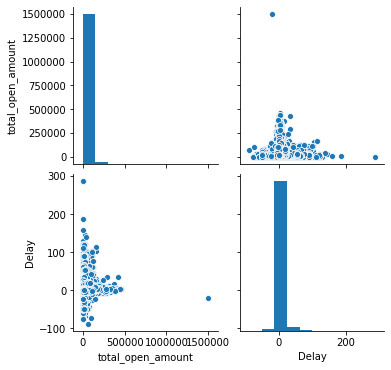

In [212]:
sns.pairplot(x_train)

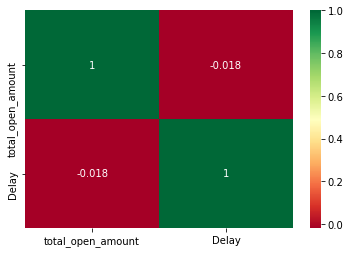

In [213]:
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')
corr=x_train.corr()
sns.heatmap(corr,annot=True,cmap=color)

# Step 7 - FE

In [214]:
##Customer_naumber

In [215]:
map_cust=x_train.groupby("cust_number")['Delay'].mean().to_dict()
encode2 = x_train.groupby("cust_number")['Delay'].mean().to_frame()
x_train['Cust_number']=x_train['cust_number'].map(map_cust)
x_train.drop('cust_number',axis = 1,inplace = True)
x_train.head()

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number
35791,U001,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,USD,11025.27,NAH4,-5,-2.125443
18481,U001,WAKE co,2019-01-09,2018-12-30,2019-01-14,USD,114737.60,NAA8,-5,-1.812183
42361,U001,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,USD,5506.22,NAH4,-5,-2.125443
32638,U001,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,USD,12202.50,NAH4,3,-2.125443
7561,U001,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,USD,16663.36,NAH4,-4,-2.125443


In [216]:

map_cust=val1.groupby("cust_number")['Delay'].mean().to_dict()
val1['Cust_number']=val1['cust_number'].map(map_cust)
val1.drop('cust_number',axis = 1,inplace = True)
val1.head()

,business_code,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number
17979,U001,TARG llc,2019-10-23,2019-10-06,2019-10-21,USD,429.61,NAA8,2,1.021583
38587,U001,WAL-MAR,2019-10-17,2019-10-06,2019-10-21,USD,31913.47,NAH4,-4,-2.492128
46497,U001,KRAFT,2019-11-27,2019-10-06,2019-11-10,USD,15161.25,NAG2,17,0.229885
18109,U001,WAL-MAR systems,2019-10-17,2019-10-06,2019-10-21,USD,13276.68,NAH4,-4,-2.492128
22,U001,C&S WH,2019-10-22,2019-10-06,2019-10-21,USD,170541.56,NAC6,1,-0.434389


In [217]:

map_cust=val2.groupby("cust_number")['Delay'].mean().to_dict()
val2['Cust_number']=val2['cust_number'].map(map_cust)
val2.drop('cust_number',axis = 1,inplace = True)
val2.head()


,business_code,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number
36500,U001,TARG us,2019-12-26,2019-12-08,2019-12-23,USD,50428.62,NAA8,3,0.187500
1427,U001,WAL-MAR in,2019-12-18,2019-12-08,2019-12-23,USD,943.12,NAH4,-5,-2.453749
3673,U001,H E BUT foundation,2019-12-24,2019-12-08,2019-12-23,USD,15803.80,NAA8,1,-3.845238
41867,U001,WAL-MAR llc,2019-12-18,2019-12-08,2019-12-23,USD,394.68,NAH4,-5,-2.453749
37833,U001,WAL-MAR,2019-12-18,2019-12-08,2019-12-23,USD,35635.59,NAH4,-5,-2.453749


In [218]:
val1['Cust_number'] = np.where(val1['Cust_number'].isnull(),0,val1['Cust_number'] )
val2['Cust_number'] = np.where(val2['Cust_number'].isnull(),0,val2['Cust_number'] )

In [219]:
#bussiness code.

In [220]:
map_cust=x_train.groupby("business_code")['Delay'].mean().to_dict()
x_train['Business_number']=x_train['business_code'].map(map_cust)
x_train.drop('business_code',axis = 1,inplace = True)
x_train.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number,Business_number
35791,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,USD,11025.27,NAH4,-5,-2.125443,0.822171
18481,WAKE co,2019-01-09,2018-12-30,2019-01-14,USD,114737.60,NAA8,-5,-1.812183,0.822171
42361,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,USD,5506.22,NAH4,-5,-2.125443,0.822171
32638,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,USD,12202.50,NAH4,3,-2.125443,0.822171
7561,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,USD,16663.36,NAH4,-4,-2.125443,0.822171


In [221]:
map_cust=val1.groupby("business_code")['Delay'].mean().to_dict()
val1['Business_number']=val1['business_code'].map(map_cust)
val1.drop('business_code',axis = 1,inplace = True)
val1.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number,Business_number
17979,TARG llc,2019-10-23,2019-10-06,2019-10-21,USD,429.61,NAA8,2,1.021583,0.252557
38587,WAL-MAR,2019-10-17,2019-10-06,2019-10-21,USD,31913.47,NAH4,-4,-2.492128,0.252557
46497,KRAFT,2019-11-27,2019-10-06,2019-11-10,USD,15161.25,NAG2,17,0.229885,0.252557
18109,WAL-MAR systems,2019-10-17,2019-10-06,2019-10-21,USD,13276.68,NAH4,-4,-2.492128,0.252557
22,C&S WH,2019-10-22,2019-10-06,2019-10-21,USD,170541.56,NAC6,1,-0.434389,0.252557


In [222]:
map_cust=val2.groupby("business_code")['Delay'].mean().to_dict()
val2['Business_number']=val2['business_code'].map(map_cust)
val2.drop('business_code',axis = 1,inplace = True)
val2.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay,Cust_number,Business_number
36500,TARG us,2019-12-26,2019-12-08,2019-12-23,USD,50428.62,NAA8,3,0.187500,0.017805
1427,WAL-MAR in,2019-12-18,2019-12-08,2019-12-23,USD,943.12,NAH4,-5,-2.453749,0.017805
3673,H E BUT foundation,2019-12-24,2019-12-08,2019-12-23,USD,15803.80,NAA8,1,-3.845238,0.017805
41867,WAL-MAR llc,2019-12-18,2019-12-08,2019-12-23,USD,394.68,NAH4,-5,-2.453749,0.017805
37833,WAL-MAR,2019-12-18,2019-12-08,2019-12-23,USD,35635.59,NAH4,-5,-2.453749,0.017805


In [223]:
map_cust=x_train.groupby("cust_payment_terms")['Delay'].mean().to_dict()
encode3 = x_train.groupby("cust_payment_terms")['Delay'].mean().to_frame()
x_train['Cust_payment_terms']=x_train['cust_payment_terms'].map(map_cust)
x_train.drop('cust_payment_terms',axis = 1,inplace = True)
x_train.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms
35791,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,USD,11025.27,-5,-2.125443,0.822171,-1.775266
18481,WAKE co,2019-01-09,2018-12-30,2019-01-14,USD,114737.60,-5,-1.812183,0.822171,1.354415
42361,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,USD,5506.22,-5,-2.125443,0.822171,-1.775266
32638,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,USD,12202.50,3,-2.125443,0.822171,-1.775266
7561,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,USD,16663.36,-4,-2.125443,0.822171,-1.775266


In [224]:
map_cust=val1.groupby("cust_payment_terms")['Delay'].mean().to_dict()
val1['Cust_payment_terms']=val1['cust_payment_terms'].map(map_cust)
val1.drop('cust_payment_terms',axis = 1,inplace = True)
val1.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms
17979,TARG llc,2019-10-23,2019-10-06,2019-10-21,USD,429.61,2,1.021583,0.252557,1.158333
38587,WAL-MAR,2019-10-17,2019-10-06,2019-10-21,USD,31913.47,-4,-2.492128,0.252557,-2.106181
46497,KRAFT,2019-11-27,2019-10-06,2019-11-10,USD,15161.25,17,0.229885,0.252557,1.007463
18109,WAL-MAR systems,2019-10-17,2019-10-06,2019-10-21,USD,13276.68,-4,-2.492128,0.252557,-2.106181
22,C&S WH,2019-10-22,2019-10-06,2019-10-21,USD,170541.56,1,-0.434389,0.252557,0.886275


In [225]:
map_cust=val2.groupby("cust_payment_terms")['Delay'].mean().to_dict()
val2['Cust_payment_terms']=val2['cust_payment_terms'].map(map_cust)
val2.drop('cust_payment_terms',axis = 1,inplace = True)
val2.head()

,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms
36500,TARG us,2019-12-26,2019-12-08,2019-12-23,USD,50428.62,3,0.187500,0.017805,0.969080
1427,WAL-MAR in,2019-12-18,2019-12-08,2019-12-23,USD,943.12,-5,-2.453749,0.017805,-2.165672
3673,H E BUT foundation,2019-12-24,2019-12-08,2019-12-23,USD,15803.80,1,-3.845238,0.017805,0.969080
41867,WAL-MAR llc,2019-12-18,2019-12-08,2019-12-23,USD,394.68,-5,-2.453749,0.017805,-2.165672
37833,WAL-MAR,2019-12-18,2019-12-08,2019-12-23,USD,35635.59,-5,-2.453749,0.017805,-2.165672


In [226]:
x_train['Week_is_2']=np.where(x_train['due_in_date'].dt.dayofweek==2,1,0)
val1['Week_is_2']=np.where(val1['due_in_date'].dt.dayofweek==2,1,0)
val2['Week_is_2']=np.where(val2['due_in_date'].dt.dayofweek==2,1,0)

In [227]:
x_train['Week_is_5']=np.where(x_train['due_in_date'].dt.dayofweek==5,1,0)
val1['Week_is_5']=np.where(val1['due_in_date'].dt.dayofweek==5,1,0)
val2['Week_is_5']=np.where(val2['due_in_date'].dt.dayofweek==5,1,0)

In [228]:
x_train['Quarter']=x_train['document_create_date.1'].dt.quarter
val1['Quarter']=val1['document_create_date.1'].dt.quarter
val2['Quarter']=val2['document_create_date.1'].dt.quarter

In [229]:
x_train['total_open_amount'] = np.where(x_train['total_open_amount']=='CAD',0.78*x_train['total_open_amount'],x_train['total_open_amount'])
val1['total_open_amount'] = np.where(val1['total_open_amount']=='CAD',0.78*val1['total_open_amount'],val1['total_open_amount'])
val2['total_open_amount'] = np.where(val2['total_open_amount']=='CAD',0.78*val2['total_open_amount'],val2['total_open_amount'])###################

In [230]:
x_train['invoice_currency'].value_counts()

USD    28390
CAD     2550
Name: invoice_currency, dtype: int64

In [231]:
x_train=x_train.drop(columns=['invoice_currency'],axis=1)##################3
val1=val1.drop(columns=['invoice_currency'],axis=1)
val2=val2.drop(columns=['invoice_currency'],axis=1)

In [232]:
x_train['due_m'] = x_train['due_in_date'].dt.month
x_train['create_m'] = x_train['document_create_date.1'].dt.month

val1['due_m'] = val1['due_in_date'].dt.month
val1['create_m'] = val1['document_create_date.1'].dt.month

val2['due_m'] = val2['due_in_date'].dt.month
val2['create_m'] = val2['document_create_date.1'].dt.month

In [233]:
x_train.head()

,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,11025.27,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
18481,WAKE co,2019-01-09,2018-12-30,2019-01-14,114737.60,-5,-1.812183,0.822171,1.354415,0,0,4,1,12
42361,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,5506.22,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
32638,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,12202.50,3,-2.125443,0.822171,-1.775266,0,0,4,1,12
7561,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,16663.36,-4,-2.125443,0.822171,-1.775266,0,0,4,1,12


In [234]:
x_train.head()

,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,WAL-MAR associates,2019-01-09,2018-12-30,2019-01-14,11025.27,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
18481,WAKE co,2019-01-09,2018-12-30,2019-01-14,114737.60,-5,-1.812183,0.822171,1.354415,0,0,4,1,12
42361,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,5506.22,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
32638,WAL-MAR co,2019-01-17,2018-12-30,2019-01-14,12202.50,3,-2.125443,0.822171,-1.775266,0,0,4,1,12
7561,WAL-MAR in,2019-01-10,2018-12-30,2019-01-14,16663.36,-4,-2.125443,0.822171,-1.775266,0,0,4,1,12


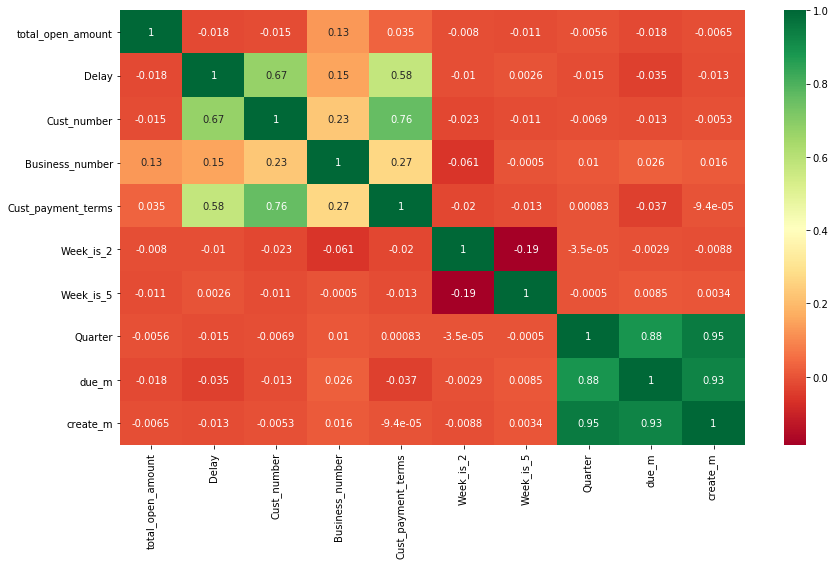

In [235]:
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')
corr=x_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True,cmap=color)

In [236]:
x_train.drop(columns=['name_customer'],axis=1,inplace=True)
val1.drop(columns=['name_customer'],axis=1,inplace=True)
val2.drop(columns=['name_customer'],axis=1,inplace=True)

In [237]:
x_train.head()

,clear_date,document_create_date.1,due_in_date,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,2019-01-09,2018-12-30,2019-01-14,11025.27,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
18481,2019-01-09,2018-12-30,2019-01-14,114737.60,-5,-1.812183,0.822171,1.354415,0,0,4,1,12
42361,2019-01-09,2018-12-30,2019-01-14,5506.22,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
32638,2019-01-17,2018-12-30,2019-01-14,12202.50,3,-2.125443,0.822171,-1.775266,0,0,4,1,12
7561,2019-01-10,2018-12-30,2019-01-14,16663.36,-4,-2.125443,0.822171,-1.775266,0,0,4,1,12


In [238]:
x_train.drop(columns=['clear_date','due_in_date','document_create_date.1'],axis=1,inplace=True)
val1.drop(columns=['clear_date','due_in_date','document_create_date.1'],axis=1,inplace=True)#################
val2.drop(columns=['clear_date','due_in_date','document_create_date.1'],axis=1,inplace=True)

In [239]:
x_train.head(10)

,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,11025.27,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
18481,114737.60,-5,-1.812183,0.822171,1.354415,0,0,4,1,12
42361,5506.22,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
32638,12202.50,3,-2.125443,0.822171,-1.775266,0,0,4,1,12
7561,16663.36,-4,-2.125443,0.822171,-1.775266,0,0,4,1,12
14827,10645.08,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
37955,10211.98,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
28275,31.56,1,0.988095,0.822171,1.354415,0,0,4,1,12
4133,128366.53,1,0.281649,0.822171,0.657070,0,0,4,1,12
11168,75417.07,0,3.558394,6.269804,6.328485,0,0,4,1,12


In [240]:
X_train = x_train.drop(columns=['Delay',],axis=1)
Y_train = x_train['Delay']
X_test = val1.drop(columns=['Delay'],axis=1)#######################################
Y_test = val1['Delay']

In [241]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=5,
              forward=True,
              scoring = 'r2',
              cv = 5)
    """
    LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

    k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

    we give forward=True if we want forward feature selection

    The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

    cv argument is for k-fold cross-validation. 

    """
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [242]:
FFS(X_train,Y_train)

('Cust_number', 'Business_number', 'Cust_payment_terms', 'Week_is_5', 'due_m')

In [243]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

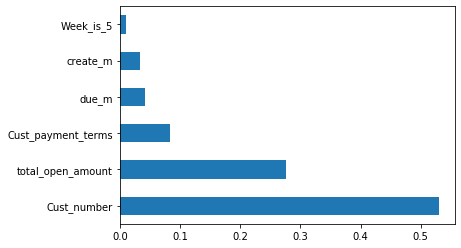

In [245]:
feature_importance=tree_based_feature_importance(X_train,Y_train)#features importance data frame

In [246]:
display(feature_importance)

,Features,Importances
1,Cust_number,0.529827
0,total_open_amount,0.276716
3,Cust_payment_terms,0.082850
7,due_m,0.041536
8,create_m,0.032933
5,Week_is_5,0.010373
4,Week_is_2,0.010339
6,Quarter,0.009931
2,Business_number,0.005495


In [247]:
X_train = x_train.drop(columns=['Delay','Week_is_2','Week_is_5','Quarter','Business_number'],axis=1)
Y_train = x_train['Delay']
X_test = val1.drop(columns=['Delay','Week_is_2','Week_is_5','Quarter','Business_number'],axis=1)
Y_test = val1['Delay']


In [248]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [251]:
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

#Predicting the Test Set Results
predicted = clf.predict(X_test)
# Fitting Simple Linear Regression to the Training Set

In [252]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

In [253]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [254]:
print(mean_squared_error(Y_test, predicted))
print(np.sqrt(np.mean((Y_test-predicted)**2)))

56.74527050313928
7.5329456723873545


In [255]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [256]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [257]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

In [258]:
print(mean_squared_error(Y_test, predicted))
print(np.sqrt(np.mean((Y_test-predicted)**2)))

19.230195166628004
4.385224642664049


In [259]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [260]:
print(mean_squared_error(Y_test, predicted))
print(np.sqrt(np.mean((Y_test-predicted)**2)))

38.519390581708755
6.206399163904042


In [261]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [262]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Support Vector Regression,56.745271,-0.002886
1,Linear Regression,19.230195,0.660136


# TRAIN TEST

In [263]:
X_train = x_train.drop(columns=['Delay','Week_is_2','Week_is_5','Quarter','Business_number'],axis=1)
Y_train = x_train['Delay']
X_test = val2.drop(columns=['Delay','Week_is_2','Week_is_5','Quarter','Business_number'],axis=1)
Y_test = val2['Delay']

In [264]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [265]:
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [266]:
Final = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [267]:
MSE_Score.append(mean_squared_error(Y_test, predicted))
R2_Score.append(r2_score(Y_test, predicted))

In [268]:
print(mean_squared_error(Y_test, predicted))
print(np.sqrt(np.mean((Y_test-predicted)**2)))
print(r2_score(Y_test, predicted))

70.4722783574233
8.394776849769338
0.3581805207135682


# Predicting and Wrapping Up

In [270]:
testb['Delay']=''

In [271]:
testb.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,Delay
46506,U001,0200707005,KING S llc,NaT,2020-03-02,2020-03-17,USD,48580.92,NAA8,
46507,U001,0200743618,MASON foundation,NaT,2020-03-30,2020-04-14,USD,3004.40,NAA8,
46508,U001,0200769623,WAL-MAR trust,NaT,2020-03-08,2020-03-23,USD,45269.49,NAH4,
46509,U001,0200762950,HAR us,NaT,2020-04-22,2020-05-07,USD,44366.40,NAA8,
46510,U001,0200707822,PUBLI,NaT,2020-05-05,2020-05-20,USD,95749.28,NAA8,


In [272]:
check81 = (testb['document_create_date.1'] > testb['due_in_date']).sum()
check81

17

In [273]:
check31 = (testb['total_open_amount'] < 0).sum()
check31

0

In [274]:
testb['Weekday']=testb['document_create_date.1'].dt.weekday

In [275]:
testb['total_open_amount'] = np.where(testb['total_open_amount']=='CAD',0.78*testb['total_open_amount'],testb['total_open_amount'])

In [276]:
testb = testb.merge(encode2, how='left', on='cust_number')
testb.rename(columns={'Delay_x':'Delay','Delay_y':'cust_number_mean'},inplace=True)

testb['cust_number_mean'][testb['cust_number_mean'].isnull()]=x_train['Delay'].mean()

In [277]:
testb = testb.merge(encode3, how='left', on='cust_payment_terms')
testb.rename(columns={'Delay_x':'Delay','Delay_y':'cust_pt_mean'},inplace=True)

testb['cust_pt_mean'][testb['cust_pt_mean'].isnull()]=x_train['Delay'].mean()

In [278]:
testb['due_m'] = testb['due_in_date'].dt.month
testb['create_m'] = testb['document_create_date.1'].dt.month

In [279]:
testb.drop(columns=['business_code','name_customer','document_create_date.1','invoice_currency'],axis=1,inplace=True)

In [280]:
x_train.head()

,total_open_amount,Delay,Cust_number,Business_number,Cust_payment_terms,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,11025.27,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
18481,114737.60,-5,-1.812183,0.822171,1.354415,0,0,4,1,12
42361,5506.22,-5,-2.125443,0.822171,-1.775266,0,0,4,1,12
32638,12202.50,3,-2.125443,0.822171,-1.775266,0,0,4,1,12
7561,16663.36,-4,-2.125443,0.822171,-1.775266,0,0,4,1,12


In [281]:
X_train = x_train.drop(columns=['Delay','Cust_number','Cust_payment_terms'],axis=1)
Y_train = x_train['Delay']
X_test = testb.drop(columns=['Delay','due_in_date','cust_number','cust_payment_terms','clear_date'],axis=1)
Y_test = testb['Delay']

In [282]:
X_test.head()

,total_open_amount,Weekday,cust_number_mean,cust_pt_mean,due_m,create_m
0,48580.92,0,0.457831,1.354415,3,3
1,3004.40,0,0.333333,1.354415,4,3
2,45269.49,6,-2.125443,-1.775266,3,3
3,44366.40,2,-0.166667,1.354415,5,4
4,95749.28,1,0.855814,1.354415,5,5


In [283]:
testb.isnull().sum()

cust_number              0
clear_date            3494
due_in_date              0
total_open_amount        0
cust_payment_terms       0
Delay                    0
Weekday                  0
cust_number_mean         0
cust_pt_mean             0
due_m                    0
create_m                 0
dtype: int64

In [284]:
X_train = X_train.drop(columns=['Business_number'],axis=1)

In [285]:
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, Y_train)

# Fitting Simple Linear Regression to the Training Set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test Set Results
predicted = clf.predict(X_test)

In [286]:
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, Y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)


In [288]:
X_test.head()

,total_open_amount,Weekday,cust_number_mean,cust_pt_mean,due_m,create_m
0,48580.92,0,0.457831,1.354415,3,3
1,3004.40,0,0.333333,1.354415,4,3
2,45269.49,6,-2.125443,-1.775266,3,3
3,44366.40,2,-0.166667,1.354415,5,4
4,95749.28,1,0.855814,1.354415,5,5


In [289]:
X_train.head()

,total_open_amount,Week_is_2,Week_is_5,Quarter,due_m,create_m
35791,11025.27,0,0,4,1,12
18481,114737.60,0,0,4,1,12
42361,5506.22,0,0,4,1,12
32638,12202.50,0,0,4,1,12
7561,16663.36,0,0,4,1,12


In [290]:
testb['Delay']=predicted

In [291]:
testb['Delay']=testb['Delay'].astype(int)

In [292]:
temp = testb['Delay'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
testb['clear_date'] = testb['due_in_date'] + temp

In [293]:
bin_ranges=[-365,15,30,45,60,365]
bin_names=["0-15 days","16-30 days","30-45 days","45-60 days",">60 days"]
testb['Aging bucket'] = pd.cut( np.array(testb['Delay']),bins=bin_ranges)
testb['Aging bucket'] = pd.cut( np.array(testb['Delay']),bins=bin_ranges, labels=bin_names)

In [294]:
import csv
testb.to_csv('1828259_HRC.csv',index=False)